# K-Means Clustering

O K-Means é um algoritmo de aprendizado de máquina não supervisionado que agrupa dados em k grupos distintos. É considerado não supervisionado porque não possui uma variável alvo definida que identifica o grupo.


Os tipos de clusters mais convencionais são:

**Clusters particionais**: dividem os dados em subconjuntos mutuamente exclusivos, de modo que cada ponto de dados pertence a exatamente um cluster. Um exemplo de algoritmo de clusterização particional é o K-Means;

**Clusters hierárquicos**: criam uma hierarquia de clusters, que podem ser representados por uma árvore chamada dendrograma. Os clusters podem ser obtidos cortando a árvore em diferentes níveis. Um exemplo de algoritmo de clusterização hierárquica é o Agglomerative Clustering;

**Clusters baseados em densidade**: agrupam os dados com base na densidade dos pontos de dados, de modo que os clusters são formados por regiões de alta densidade separadas por regiões de baixa densidade. Um exemplo de algoritmo de clusterização baseado em densidade é o DBSCAN (veja o arquivo 4.1-DBSCAN_temperatura.ipynb deste repositório).

De forma rápida, o algoritmo de CLustering K-Means funciona da seguinte forma:

1.   Escolhe-se um número k de clusters a serem formados.
2.   Inicializa-se k centroides (pontos que representam o centro de cada cluster) aleatoriamente ou usando algum critério.
3.   Atribui-se cada ponto de dados ao cluster cujo centroide é o mais próximo, usando alguma medida de distância (por exemplo, a distância euclidiana).
4.   Atualiza-se o centroide de cada cluster como sendo a média dos pontos de dados atribuídos a ele.
5.   Repete-se os passos 3 e 4 até que os centroides não mudem mais ou até que se atinja um número máximo de iterações.

Um dos desafios ao usar o K-Means é determinar o número ideal de clusters (quantidade de K que serão agrupados os dados). Isso pode ser feito usando métodos como o Método do Cotovelo (Elbow Method) ou Silhouette Score, que avaliam a qualidade dos clusters para diferentes valores de K.

In [1]:
#!pip install -U scikit-learn
#!pip show scikit-learn

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

Para começar o experimento, separamos 2 grupos de alimentos obtidos a partir da tabela TACO da Unicamp.
Site da TACO com os dados originais: http://www.unicamp.br/nepa/taco/tabela.php?ativo=tabela

Estes dados estão nos 2 datasets: Alimentos e Alimentos2. Em ambos arquivos limitamos a informação nutricional para conter apenas Lipídeos e Ferro dos alimentos, para facilitar a didática e explicação do algoritmo.

In [2]:
dados = pd.read_csv("https://raw.githubusercontent.com/diegonogare/MachineLearning/main/alimentos.csv", sep=';')
#dados = pd.read_csv("https://raw.githubusercontent.com/diegonogare/MachineLearning/main/alimentos2.csv", sep=';')

In [3]:
dados.describe()

,Lipídeos,Ferro
count,28.000000,28.000000
mean,8.114286,1.417857
std,9.945992,1.514389
min,0.000000,0.000000
25%,0.650000,0.275000
50%,3.350000,0.700000
75%,13.700000,2.400000
max,33.500000,5.700000


In [4]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 3 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Descrição dos alimentos  28 non-null     object 
 1   Lipídeos                 28 non-null     float64
 2   Ferro                    28 non-null     float64
dtypes: float64(2), object(1)
memory usage: 800.0+ bytes


In [5]:
dados.head()

,Descrição dos alimentos,Lipídeos,Ferro
0,Queijo. minas. frescal,20.2,0.9
1,Queijo. minas. meia cura,24.6,0.2
2,Queijo. mozarela,25.2,0.3
3,Queijo. parmesão,33.5,0.5
4,Queijo. pasteurizado,27.4,0.3


Repare que, ao gerar um gráfico de dispersão dos dados, não são simples de se separar visualmente. A proposta é exatamente essa, encontrar grupos similares de dados a partir das distâncias entre si.

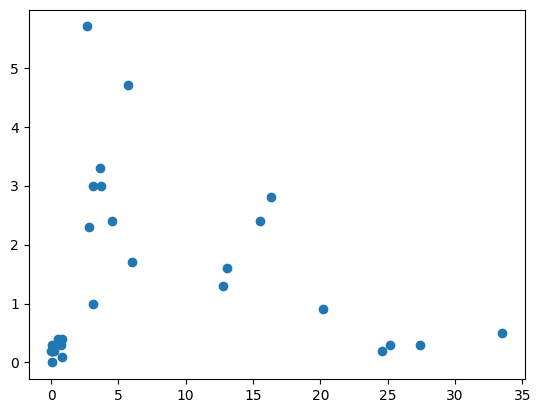

In [6]:
plt.scatter(dados['Lipídeos'],dados['Ferro'])

A construção dos clusters é relativamente simples. Neste exemplo, informamos ao algoritmo a quantidade de K que queremos (que é a quantidade de clusters que os dados deverão ser agrupados) e quais são os dados que serão utilizados para fazer os agrupamentos.

Repare que passamos apenas os dados de Lipídeo e Ferro para o algoritmo fazer o treinamento, e a partir disso, teremos os resultados armazenados na variável cluster.

In [7]:
cluster = KMeans(n_clusters=4).fit(dados[['Lipídeos','Ferro']])
#cluster = KMeans(n_clusters=5).fit(dados[['Lipídeos','Ferro']])


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Ao imprimir a variável cluster, nos é retornado a quantidade de grupos distintos que o algoritmo utilizou. Ao explorar um pouco mais, trazendo os *labels_* desta variável cluster é possível entender em qual cluster aquela observação (linha dos dados) foi atribuída. Também é possível entender quais foram as posições finais dos centróides de cada um dos clusters ao imprimir o *cluster_centers_* da variável cluster.

In [8]:
print(cluster)
print(cluster.labels_)
print(cluster.cluster_centers_)

KMeans(n_clusters=4)
[3 1 1 1 1 3 3 3 3 0 0 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0]
[[ 3.91111111  3.01111111]
 [27.675       0.325     ]
 [ 0.34        0.23      ]
 [15.58        1.8       ]]


In [9]:
dados2=dados
dados2['clusters'] = cluster.labels_

dados2.head()

,Descrição dos alimentos,Lipídeos,Ferro,clusters
0,Queijo. minas. frescal,20.2,0.9,3
1,Queijo. minas. meia cura,24.6,0.2,1
2,Queijo. mozarela,25.2,0.3,1
3,Queijo. parmesão,33.5,0.5,1
4,Queijo. pasteurizado,27.4,0.3,1


Veja que agora, ao imprimir os mesmos dados de antes, porém modificando o atributo de impressão cor reflita o cluster que foi atribuído a cada observação, que os dados próximos entre si estão encaixados em um mesmo cluster e dados mais afastados ficam em outro cluster.

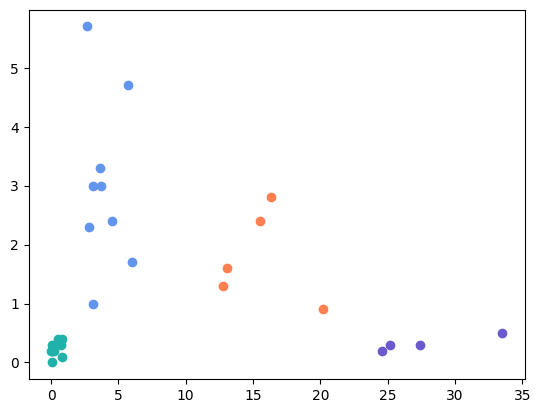

In [10]:
cores = {0:'cornflowerblue',1:'slateblue',2:'lightseagreen',3:'coral',4:'hotpink'}

for grupo in dados2['clusters'].unique():
    tmp = dados2[dados2['clusters'] == grupo]
    plt.scatter(tmp['Lipídeos'], tmp['Ferro'], color=cores[grupo] )


Lembram-se que era possível retornar a posição final de cada centróide dentro de um cluster. Com base nisso é possível retornar a posição deles também de forma gráfica.

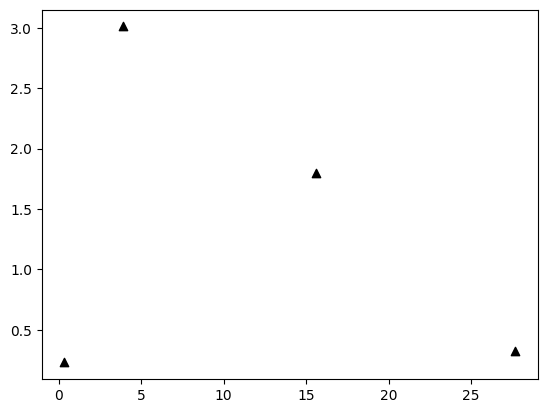

In [11]:
plt.scatter(cluster.cluster_centers_[:, 0], cluster.cluster_centers_[:, 1], color='black', marker='^')


## Fazendo a predição de um novo ponto

Agora imagine a situação que você terá um novo alimento para encaixar em um destes grupos. Para isso, é necessário pegar o modelo treinado anteriormente e informar os dados de entrada do novo alimento para descobrir a qual grupo ele faz parte.

Repare que a nova observação (nova linha de dados) não tem nenhuma indicação de grupo ou qualquer relação que a faça se encaixar em um dos clustes existentes.

Veja o ponto preto no grafico, essa é a posição relativa ao novo dado que estamos querendo predizer.

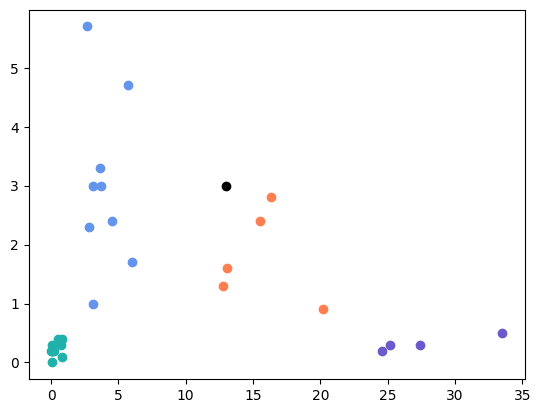

In [12]:
Novo_Dado_Lipideo = [13]
Novo_Dado_Ferro = [3]
Novo_Dado = {'Lipideo':Novo_Dado_Lipideo, 'Ferro':Novo_Dado_Ferro }
df = pd.DataFrame(Novo_Dado)

for grupo in dados2['clusters'].unique():
    tmp = dados2[dados2['clusters'] == grupo]
    plt.scatter(tmp['Lipídeos'], tmp['Ferro'], color=cores[grupo] )

plt.scatter(df['Lipideo'], df['Ferro'], c='black')

Utilizando a função *Predict* do modelo treinado, é possível informar os valores de entrada da nova observação e retornar a qual cluster ela faz parte.
O valor retornado é declarado a qual cluster esse elemento faz parte (lembrando que é um calculo de aproximação).

In [13]:
novo_valor = cluster.predict( [ df.iloc[0] ])


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


Ao chamar o *Transform* é possível ver a distância calculada entre a nova observação e os centróides do algoritmo treinado. Veja que são apresentados os valores da distância, e o menos valor é exatamente qual cluster foi definido;

In [14]:
valor_Transform = cluster.transform([ df.iloc[0][0:2] ])
print(valor_Transform)

[[ 9.08889568 14.91681099 12.95949459  2.84541737]]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


In [15]:
print(novo_valor)

[3]


In [16]:
df['clusters'] = novo_valor

print(df)

   Lipideo  Ferro  clusters
0       13      3         3


Repare que, agora, ao imprimir os pontos iniciais utilizados, mais o ponto do novo cluster utilizando o mesmo critério de impressão de cores, o novo dado será adicionado ao cluster informado no Predict. Inclusive com os centróides também demarcados nessa impressão do gráfico.

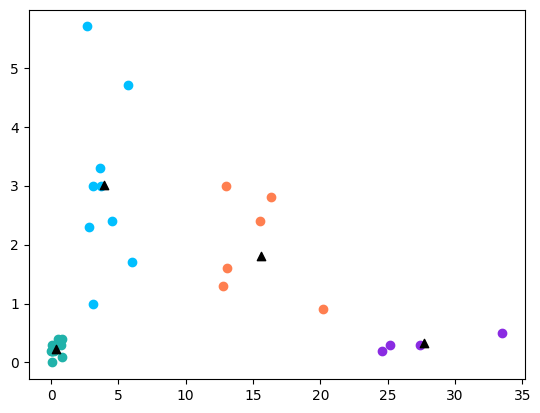

In [17]:
cores = {0:'deepskyblue',1:'blueviolet',2:'lightseagreen',3:'coral',4:'hotpink'}
for grupo in dados2['clusters'].unique():
    tmp = dados2[dados2['clusters'] == grupo]
    plt.scatter(tmp['Lipídeos'], tmp['Ferro'], color=cores[grupo] )

plt.scatter(df['Lipideo'], df['Ferro'], color=cores[df.iloc[0]['clusters']])

plt.scatter(cluster.cluster_centers_[:, 0], cluster.cluster_centers_[:, 1], color='black', marker='^')

